## Project Title :
### Deciphering the Smog: A Root Cause Analysis of Air Quality Anomalies in Sanathnagar, Hyderabad (2025)

#### Problem :
- I have heard that Hyderabad is most populated city in Telangana on News. so i collect data model predicted data where it only showing winter has HIGH POLLUTION. But the Area SanathNagar showed raise even in SUMMER. so, i have decided to anlayze and find out the root cause of pollution in SanathNagar Hyderabad.

- Note : i have concised this anlaysis only for SanathNagar (my nearby area). but there are other stations too in HYD.

### Data :   (6 months data from 2025 April - September)
- **Data Source** : (downloaded from Government Data portal)
  
- **Central Control Room for Air Quality Management
Delhi NCR**
- Link : https://airquality.cpcb.gov.in/

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# Data 

In [3]:
df = pd.read_csv('sn_ap_data.csv',usecols=['Timestamp','PM2.5 (µg/m³)'])
df

,Timestamp,PM2.5 (µg/m³)
0,2025-04-01 00:00:00,40.75
1,2025-04-01 01:00:00,40.00
2,2025-04-01 02:00:00,38.50
3,2025-04-01 03:00:00,33.50
4,2025-04-01 04:00:00,30.25
...,...,...
3691,2025-09-01 19:00:00,20.00
3692,2025-09-01 20:00:00,28.00
3693,2025-09-01 21:00:00,28.75
3694,2025-09-01 22:00:00,15.75


# Quick checks

In [4]:
df.shape

(3696, 2)

In [5]:
df.size

7392

In [6]:
df.dtypes

Timestamp         object
PM2.5 (µg/m³)    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      3696 non-null   object 
 1   PM2.5 (µg/m³)  3579 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.9+ KB


In [8]:
df.describe()

,PM2.5 (µg/m³)
count,3579.000000
mean,32.736809
std,84.812898
min,1.000000
25%,13.500000
50%,18.250000
75%,23.750000
max,591.000000


In [9]:
df.isnull().sum()

Timestamp          0
PM2.5 (µg/m³)    117
dtype: int64

# Data cleaning

In [10]:
#-----Changing the Timestamp (obj) -> Timestamp(date_time)----
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [11]:
df.dtypes        # timestamp column changed into datetime format

Timestamp        datetime64[ns]
PM2.5 (µg/m³)           float64
dtype: object

In [12]:
# making timestamp column as index. in timeseries anlaysis it very important
df.set_index(df['Timestamp'],inplace=True)
df.rename(columns={'Timestamp':'Date_time'},inplace = True)

In [13]:
# droping the column Date_time (duplicate)
df.drop(columns=['Date_time'],inplace=True)

In [14]:
df

,PM2.5 (µg/m³)
Timestamp,
2025-04-01 00:00:00,40.75
2025-04-01 01:00:00,40.00
2025-04-01 02:00:00,38.50
2025-04-01 03:00:00,33.50
2025-04-01 04:00:00,30.25
...,...
2025-09-01 19:00:00,20.00
2025-09-01 20:00:00,28.00
2025-09-01 21:00:00,28.75


## Filling null values (Interpolate)

In [15]:
df['PM2.5 (µg/m³)']=df['PM2.5 (µg/m³)'].interpolate(method = 'time')

In [16]:
df.head(2)

,PM2.5 (µg/m³)
Timestamp,
2025-04-01 00:00:00,40.75
2025-04-01 01:00:00,40.00


In [17]:
df.isnull().sum()           # null values are cleared out.

PM2.5 (µg/m³)    0
dtype: int64

# Feature engineering
- As we see there is only one column **PM2.5 (µg/m³)** which is the most important column
- But for analysis like hour or month or weeks , i am creating some features.
- and alos creating important feature AQI labels(good,bad) for pm2.5 data for easy understanding by stakeholders and clients

In [18]:
# creating 'Hour'
df['Hour']=df.index.hour

In [19]:
# creating 'month'
df['Month']=df.index.month

In [20]:
# creating 'day of the week'
df['Day_of_Week']=df.index.day_name()

### creating 'AQI range labels'
| PM2.5 Concentration (μg/m3)|   Category      | Color for Graph|
|----------------------------|-----------------|------------------
|         0 - 30             |     Good        |  Green         |
|        31 - 60             | Satisfactory    |  Yellow-Green  |
|        61 - 90             | Moderate        |  Yellow        |
|        91 - 120            | Poor            |  Orange        |
|       121 - 250            | Very Poor       |  Red           |
|       250+                 | Severe          |  DarkRed/Maroon|
|                            |                 |                |

In [21]:
def aqi_label(data):
    if data<=30:
        return 'Good'
    elif data<=60:
        return 'Stisfactory'
    elif data<=90:
        return 'Moderate'
    elif data<=120:
        return 'Poor'
    elif data<=250:
        return 'Very Poor'
    else:
        return 'Severe'
df['Category']= df['PM2.5 (µg/m³)'].apply(aqi_label)

In [22]:
df.Category.unique()

array(['Stisfactory', 'Good', 'Moderate', 'Very Poor', 'Severe'],
      dtype=object)

In [23]:
df.head()

,PM2.5 (µg/m³),Hour,Month,Day_of_Week,Category
Timestamp,,,,,
2025-04-01 00:00:00,40.75,0,4,Tuesday,Stisfactory
2025-04-01 01:00:00,40.00,1,4,Tuesday,Stisfactory
2025-04-01 02:00:00,38.50,2,4,Tuesday,Stisfactory
2025-04-01 03:00:00,33.50,3,4,Tuesday,Stisfactory
2025-04-01 04:00:00,30.25,4,4,Tuesday,Stisfactory


# Analysis and Visualization

- **HOUR vs PARTICULATE_MATTER 2.5 (PM2.5)**

In [24]:
avg = df.groupby('Hour')['PM2.5 (µg/m³)'].mean().reset_index(name='avg_pm')['avg_pm']
avg=round(avg,0)

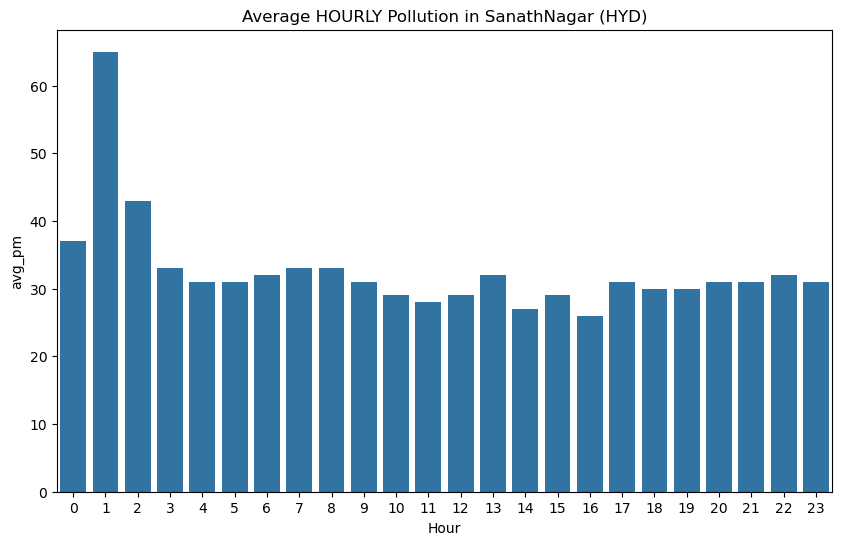

In [41]:
plt.figure(figsize=(10,6))
hours =df.Hour.unique()
sns.barplot(x=hours,y=avg)
plt.title('Average HOURLY Pollution in SanathNagar (HYD)')
plt.xticks(hours)
plt.xlabel('Hour')
plt.show()

**Insights**
- The Highest Pollutin seen in night 1:00am , because it very cool so, the pollution traps under the cool air on top of this hot air sits.
- And it is clear that NIGHT_TIME HEAVY VEHICLES run more which causes the rising of pollution.
- then the pollution graudally decreased and stablized at 4-5am .
- Again 6-9am the pollution raised a bit because of people travel to works this time. and at 11'o clock' because of low travel very less pollution.
- after noon 1 o clock pollution raised because of lunch time or off-day works.
- LOWEST POLLUTION RECORDING TME IS 4:00 PM....................
- After this pollution again raising.

- so, it is good to go outside at 4pm evening . because of lowest avg pollution of the day.

- **Month vs PM2.5**

In [32]:
month = df.groupby('Month')['PM2.5 (µg/m³)'].mean()
month

Month
4    53.750639
5    25.512433
6    49.578910
7    17.016653
8    19.513138
9    20.812500
Name: PM2.5 (µg/m³), dtype: float64

Text(0.5, 1.0, 'Average Monthly Pollution in SanathNagar (HYD)')

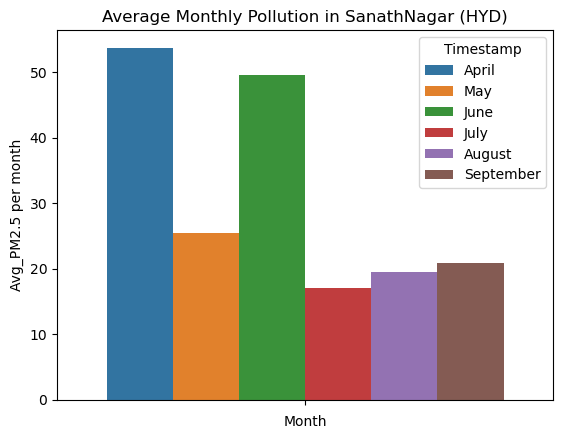

In [50]:
sns.barplot(hue=df.index.month_name().unique(),y=month.values,palette=sns.color_palette(n_colors=6))

plt.xlabel('Month')
plt.ylabel('Avg_PM2.5 per month')
plt.title('Average Monthly Pollution in SanathNagar (HYD)')

**Insights**
- we have seen APRIL the avg pollution is high because of summer effect(fastens the chemical reactions) / traffic emissions.
- JUNE is 2nd higest avg pollution because of pre-monsoon winds and road_dust cause spike in pollution.

- MAY 2025 having full pre-monsoon rains,pollutants **washed away by rains**  that India Meteorological Department (IMD) issued **orange alert**
- from JULY - SEPTEMBER Hyderabad experienced **SOUTH-WEST MONSOONS**, because of this we see less pollution.

In [ ]:
DayofWeek vs PM2.5

In [70]:
dayweek = df.groupby('Day_of_Week')['PM2.5 (µg/m³)'].mean()
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data=dayweek.reindex(custom_order)
data

Day_of_Week
Monday       40.311051
Tuesday      24.575019
Wednesday    19.201848
Thursday     24.735292
Friday       25.366761
Saturday     23.155657
Sunday       71.927459
Name: PM2.5 (µg/m³), dtype: float64

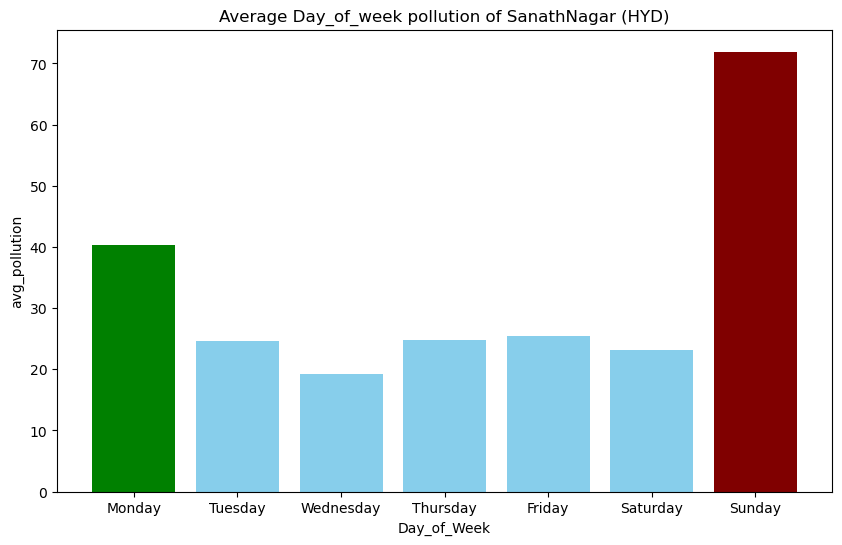

In [84]:
plt.figure(figsize=(10,6))
plt.bar(data.index,data.values,color=['green','skyblue','skyblue','skyblue','skyblue','skyblue','maroon'])
plt.xlabel('Day_of_Week')
plt.ylabel('avg_pollution')
plt.title('Average Day_of_week pollution of SanathNagar (HYD)')
plt.show()

**Insights**(SanathNagar)
- Most the pollution raise is on **SUNDAY**. because it is weekend most of the people roam in city
- Monday is Because most people goes to work on monday, especially work from home employees (because it is week_starting) we can expect it.
- all remaining days of week is normal than above days.

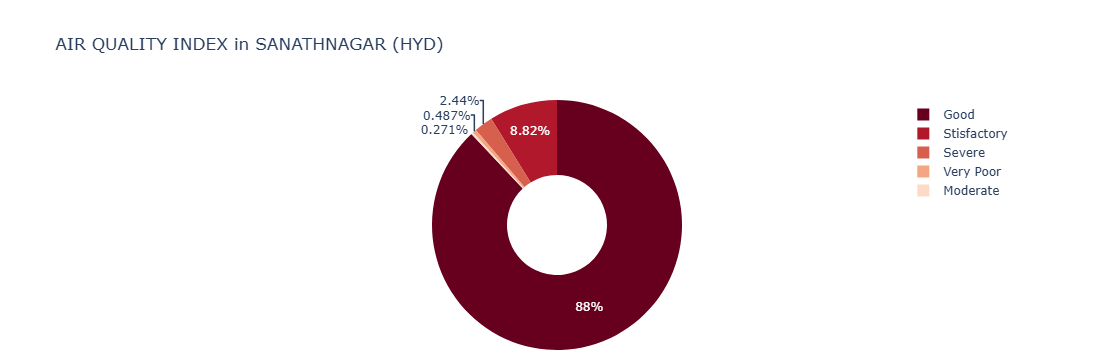

In [105]:
import plotly.express as px
data = df.Category.value_counts(normalize=True)
chart  = px.pie(data,names = data.index,values = data.values,hole=0.4,title='AIR QUALITY INDEX in SANATHNAGAR (HYD)',color_discrete_sequence=px.colors.sequential.RdBu)
chart.update_layout(margin=dict(r=10,b=10))

**Insights**
- It seems that **AIR QUALITY INDEX** in **SANATHNAGAR (HYD)**  **88% GOOD**
- ONLY SEEN RAISE IN POLLUTION AT WEEKENDS OR WEEKSTARTS OR MIDNIGHT (due to heavy vehicles & cool_climate) 

## Top 3 Highest Pollution Record 2025 (6months) in SanathNagar (Hyderabad)    

In [160]:
high_pol = df.groupby([df.index.date])['PM2.5 (µg/m³)'].mean().reset_index(name='avg_pollution').sort_values(by='avg_pollution',ascending=False)
top_3=high_pol[:3]
top_3

,index,avg_pollution
12,2025-04-13,591.000000
75,2025-06-15,548.343750
13,2025-04-14,270.041667


In [161]:
dates = top_3['index'].values.astype(str)
dates

array(['2025-04-13', '2025-06-15', '2025-04-14'], dtype='<U10')

<Axes: ylabel='avg_pollution'>

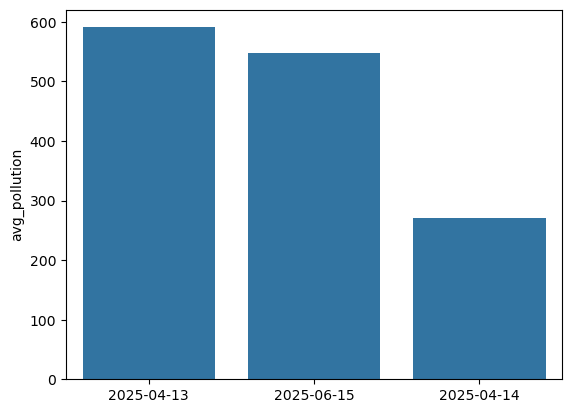

In [162]:
sns.barplot(x=dates,y=top_3.avg_pollution)

**Resons**
- 1. April 13 & 14, 2025: Ambedkar Jayanti Celebrations
        - The Cause: The spike to 591 on April 13 (Sunday) was due to the massive gatherings and processions for Dr. B.R. Ambedkar Jayanti (celebrated officially on
     April 14).
- 2. June 15, 2025: Pre-Monsoon Dust Storm
       - The Cause: The spike to 548 on June 15 (Sunday) was caused by a severe dust storm and squall just before the monsoon fully set in.